<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/EmployeeTrunOverAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Turnover Analytics
Project Statement:
Portobello Tech is an app innovator that has devised an intelligent way of
predicting employee turnover within the company. It periodically evaluates
employees' work details including the number of projects they worked upon,
average monthly working hours, time spent in the company, promotions in the
last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace.
The data could be used to identify patterns in work style and their interest to
continue to work in the company.  
The HR Department owns the data and uses it to predict employee turnover.
Employee turnover refers to the total number of workers who leave a company
over a certain time period.


# Steps to complete:  


1. Perform data quality check by checking for missing values if any
2. Balance and then split the data into a test-train split
3. Understand what factors contributed most to employee turnover by
EDA
4. Determine whether grouping features together into a single feature
helps.  Specifically, look at time spent at company and number of
projects (which both correlate with tenure, but together can capture
a notion of “engagement”)
5. Train classification models (SVMs, Decision Trees, Random Forest)
using k-folds. And evaluate which model is the best performer
6. Train the best model using all available data in the train set
7. Test the trained model against the test set and output accuracy,
precision, recall, and f1 score


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
### Perform data quality check by checking for missing values if any
display(df.describe())
display(df.info())
display(df.head())
# Checking to see if their are any null values
# Hence no null values
# Mean value are satifactory and no negative values.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# So their's a column name Sales that needs to be changed into department.
df.rename(columns={'sales': 'department'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Since we need every thing in numbers, I will be changing salary column to 0 if it is low, 1 if it is medium and 2 is it is high
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_mapping)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


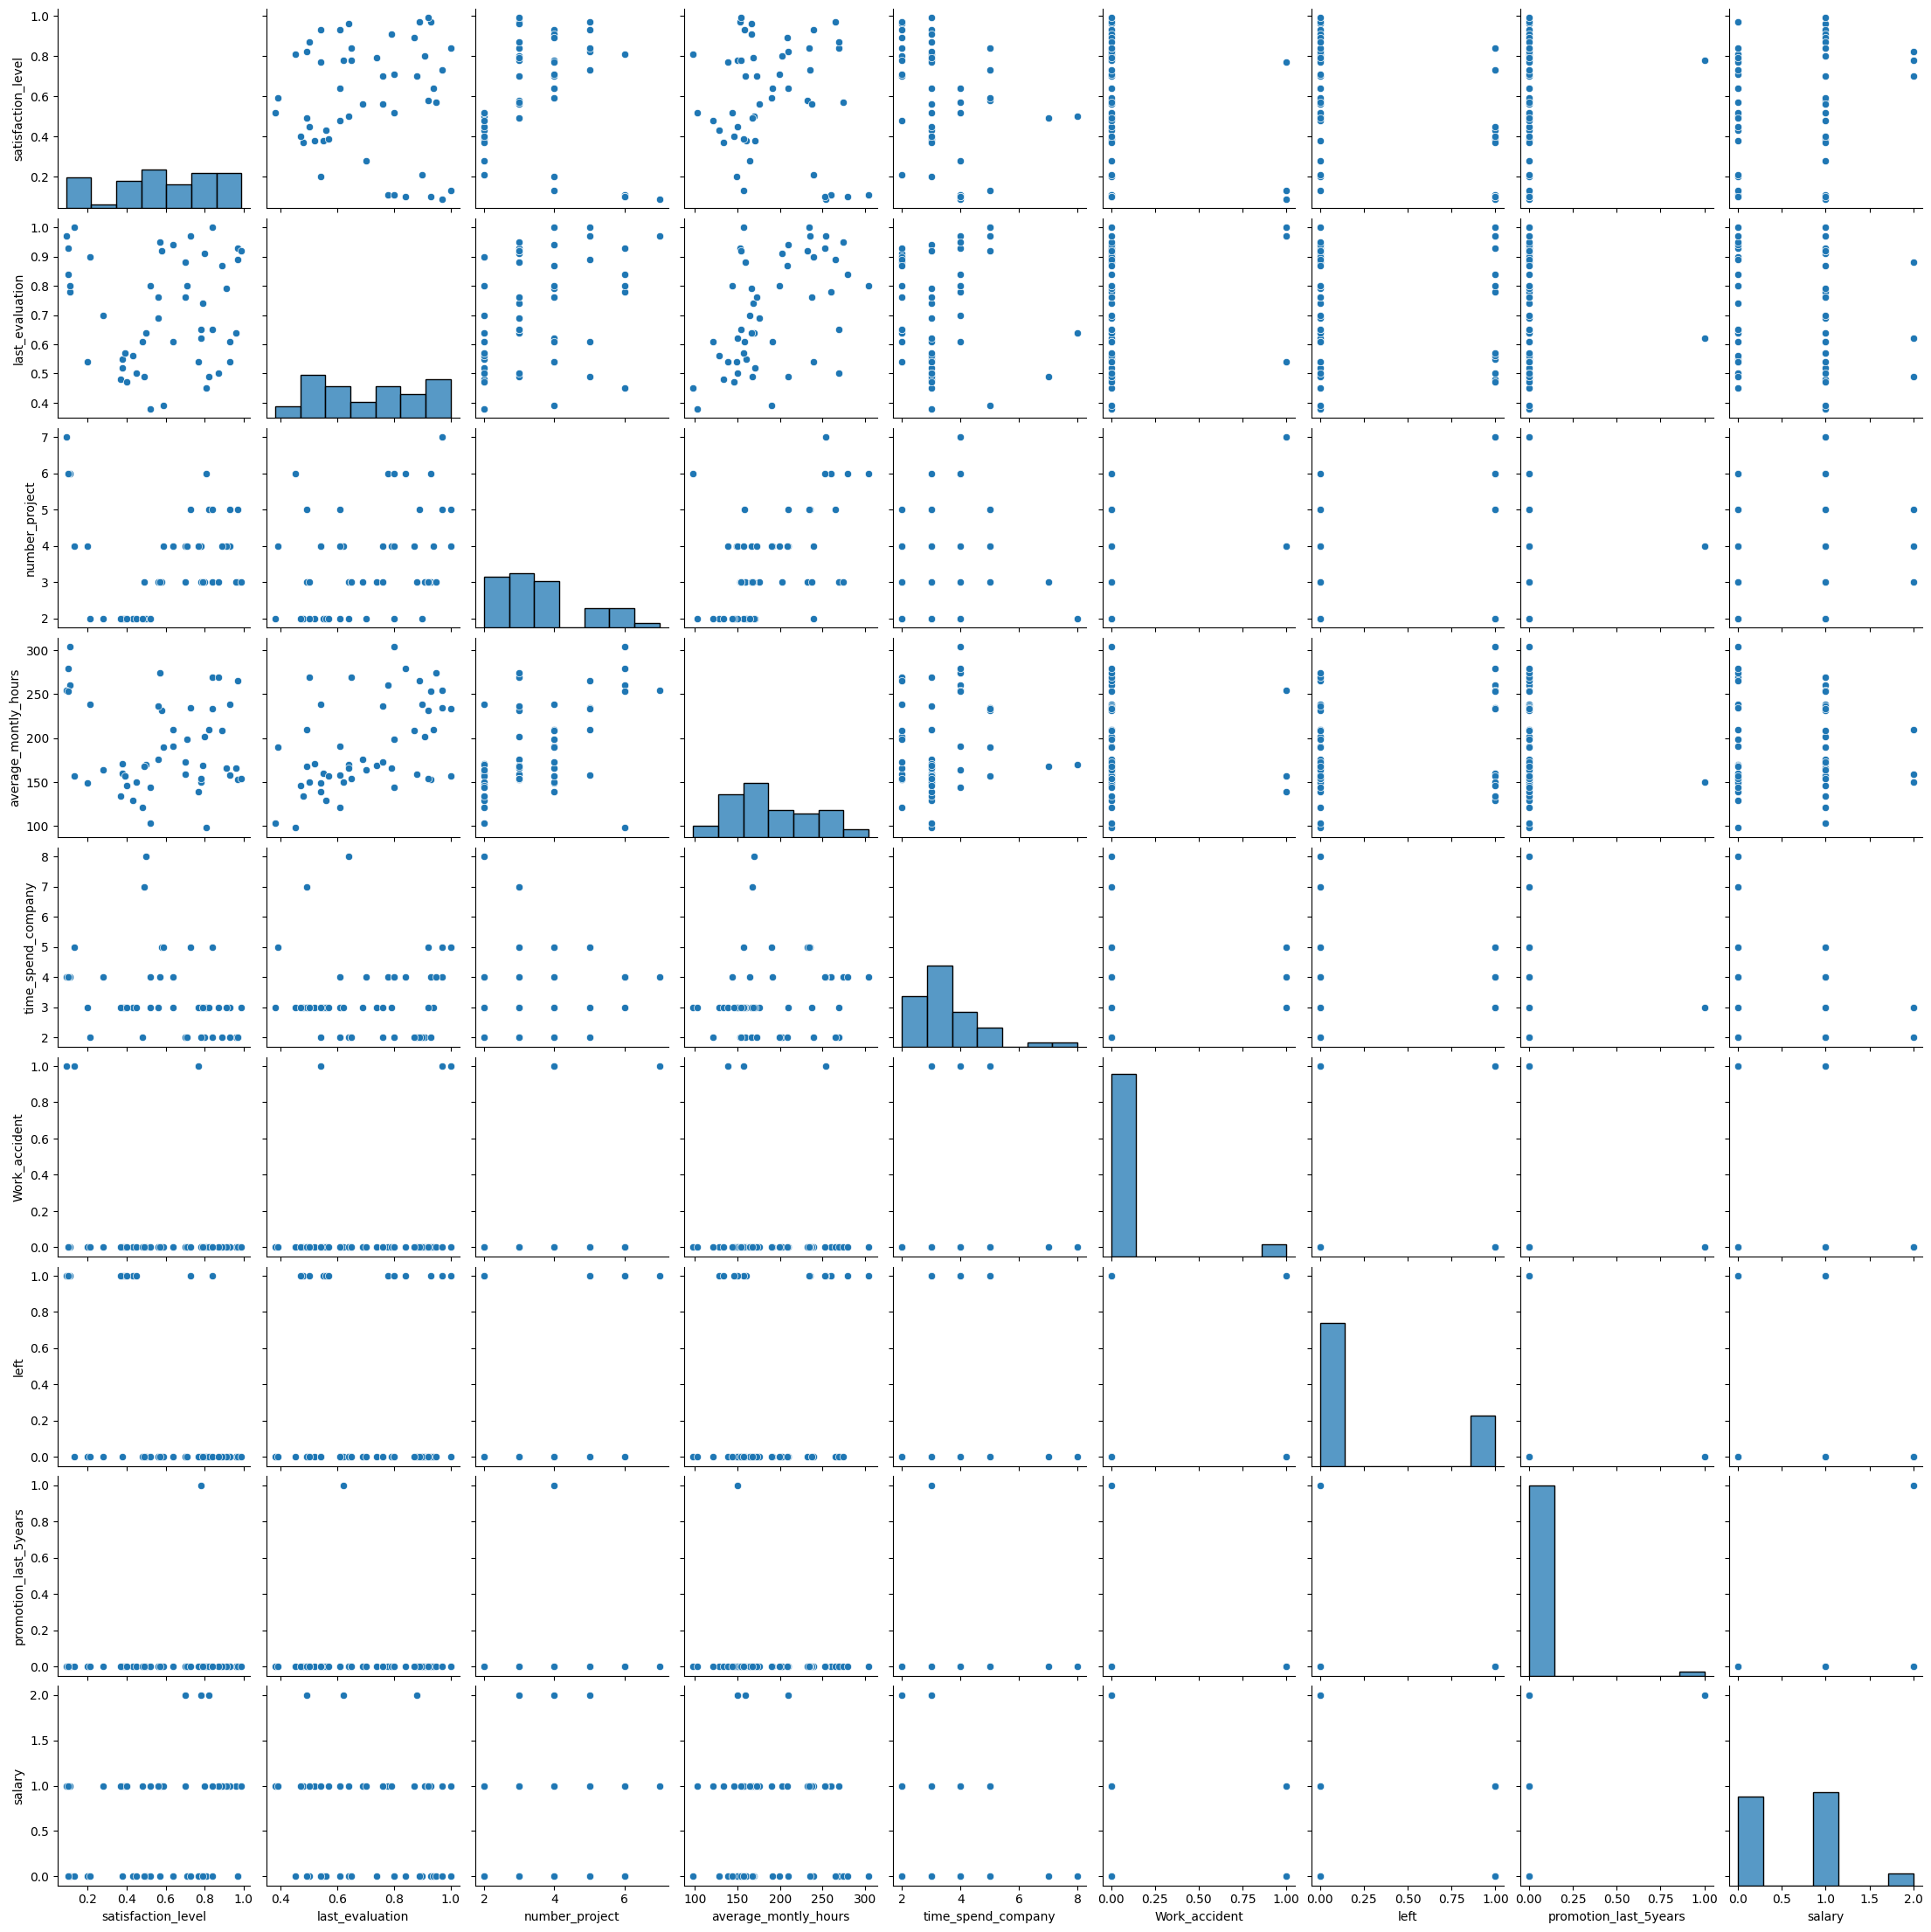

In [ ]:
# Understand what factors contributed most to employee turnover by EDA
sns.pairplot(df.sample(50))

<Axes: xlabel='salary', ylabel='satisfaction_level'>

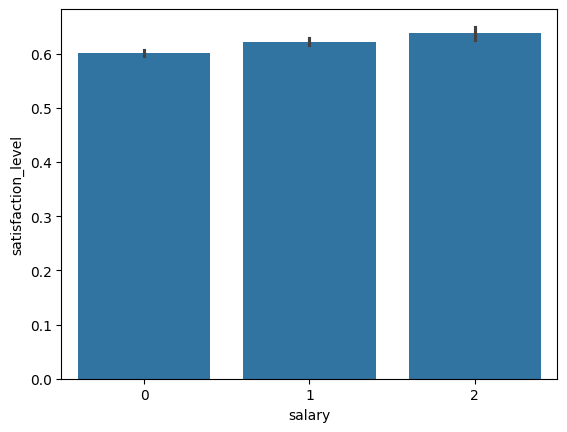

In [ ]:
sns.barplot(x='salary', y = 'satisfaction_level', data = df, estimator="mean")
# Undertanding some relation between salary and satisfication
# higher the salary higher the satisfication

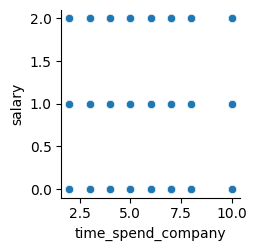

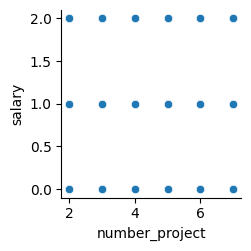

In [ ]:
sns.pairplot(df, x_vars= ['time_spend_company'], y_vars= 'salary')
sns.pairplot(df, x_vars= ['number_project'], y_vars= 'salary')
# So looking at this graph we can conclude that time spend on a company and number of projects completed is not related to salary hike

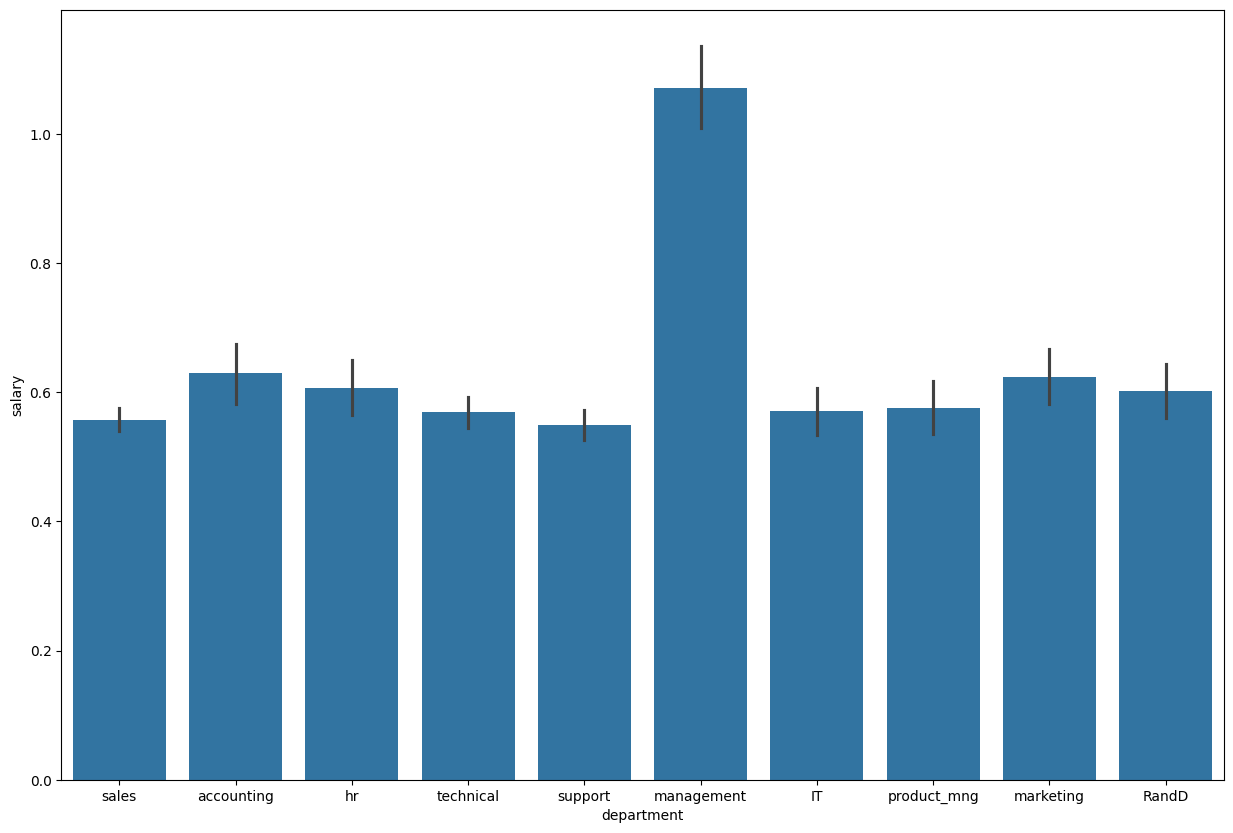

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'department', y = 'salary', data = df)
plt.xlabel('department')
plt.ylabel('salary')
plt.show()
# looking at this graph people from managment department makes more

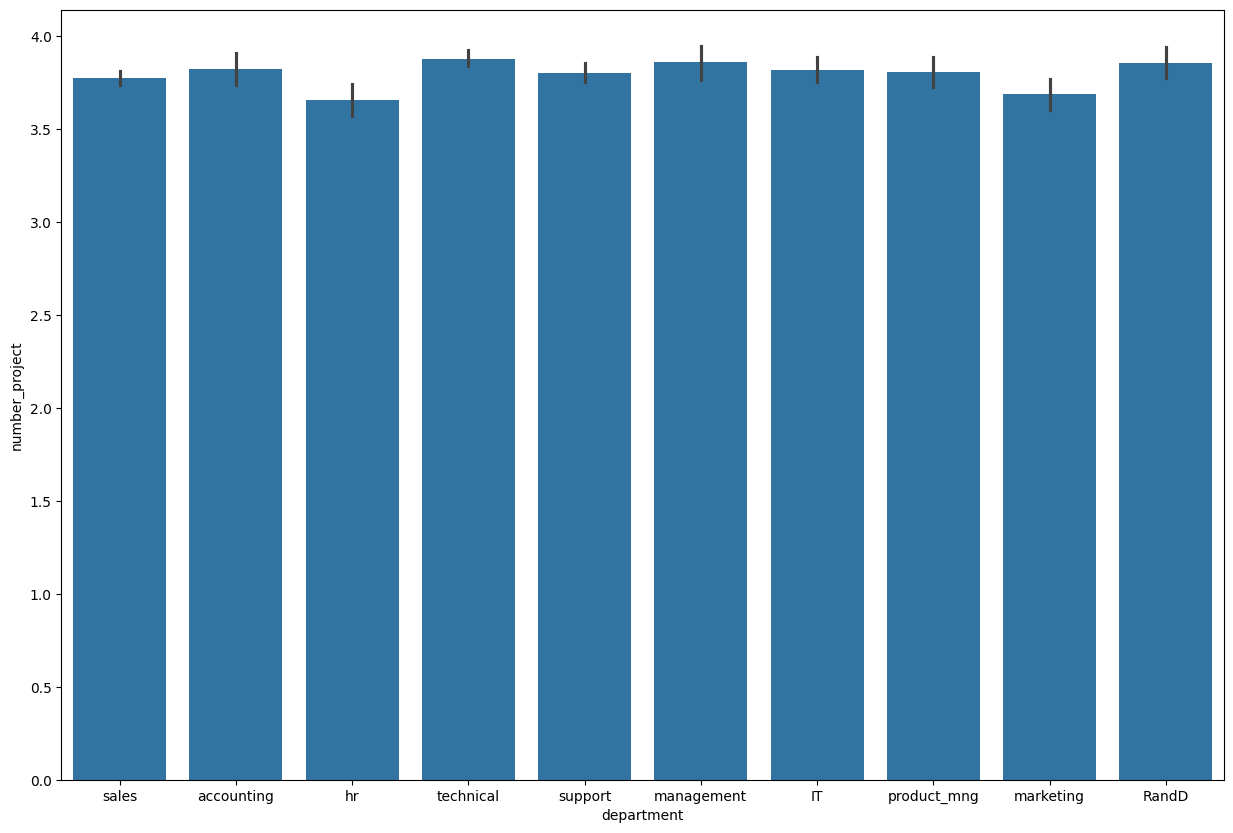

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'department', y = 'number_project', data = df)
plt.xlabel('department')
plt.ylabel('number_project')
plt.show()
# So looking at the relation ship between department and number of project
# Look like they all go through same amount of work load

In [ ]:
left_count = df[df['left'] == 1]['left'].count()
current_count = df[df['left'] == 0]['left'].count()

print("Total count of employees who have left:", left_count)
print("Total count of employees who are still working:", current_count)
# Number of people who left the work and who are still working

Total count of employees who have left: 3571
Total count of employees who are still working: 11428


In [ ]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


<Axes: xlabel='left', ylabel='time_spend_company'>

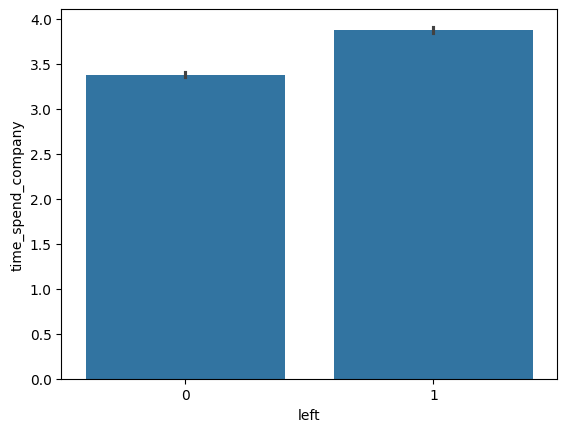

In [ ]:
sns.barplot(x = 'left', y = 'time_spend_company', data = df)
# 1 is the left the company
# 0 is they still working
# So most employee turnover happened after their third year on company.

# So most employee turnover happened after their third year on company.

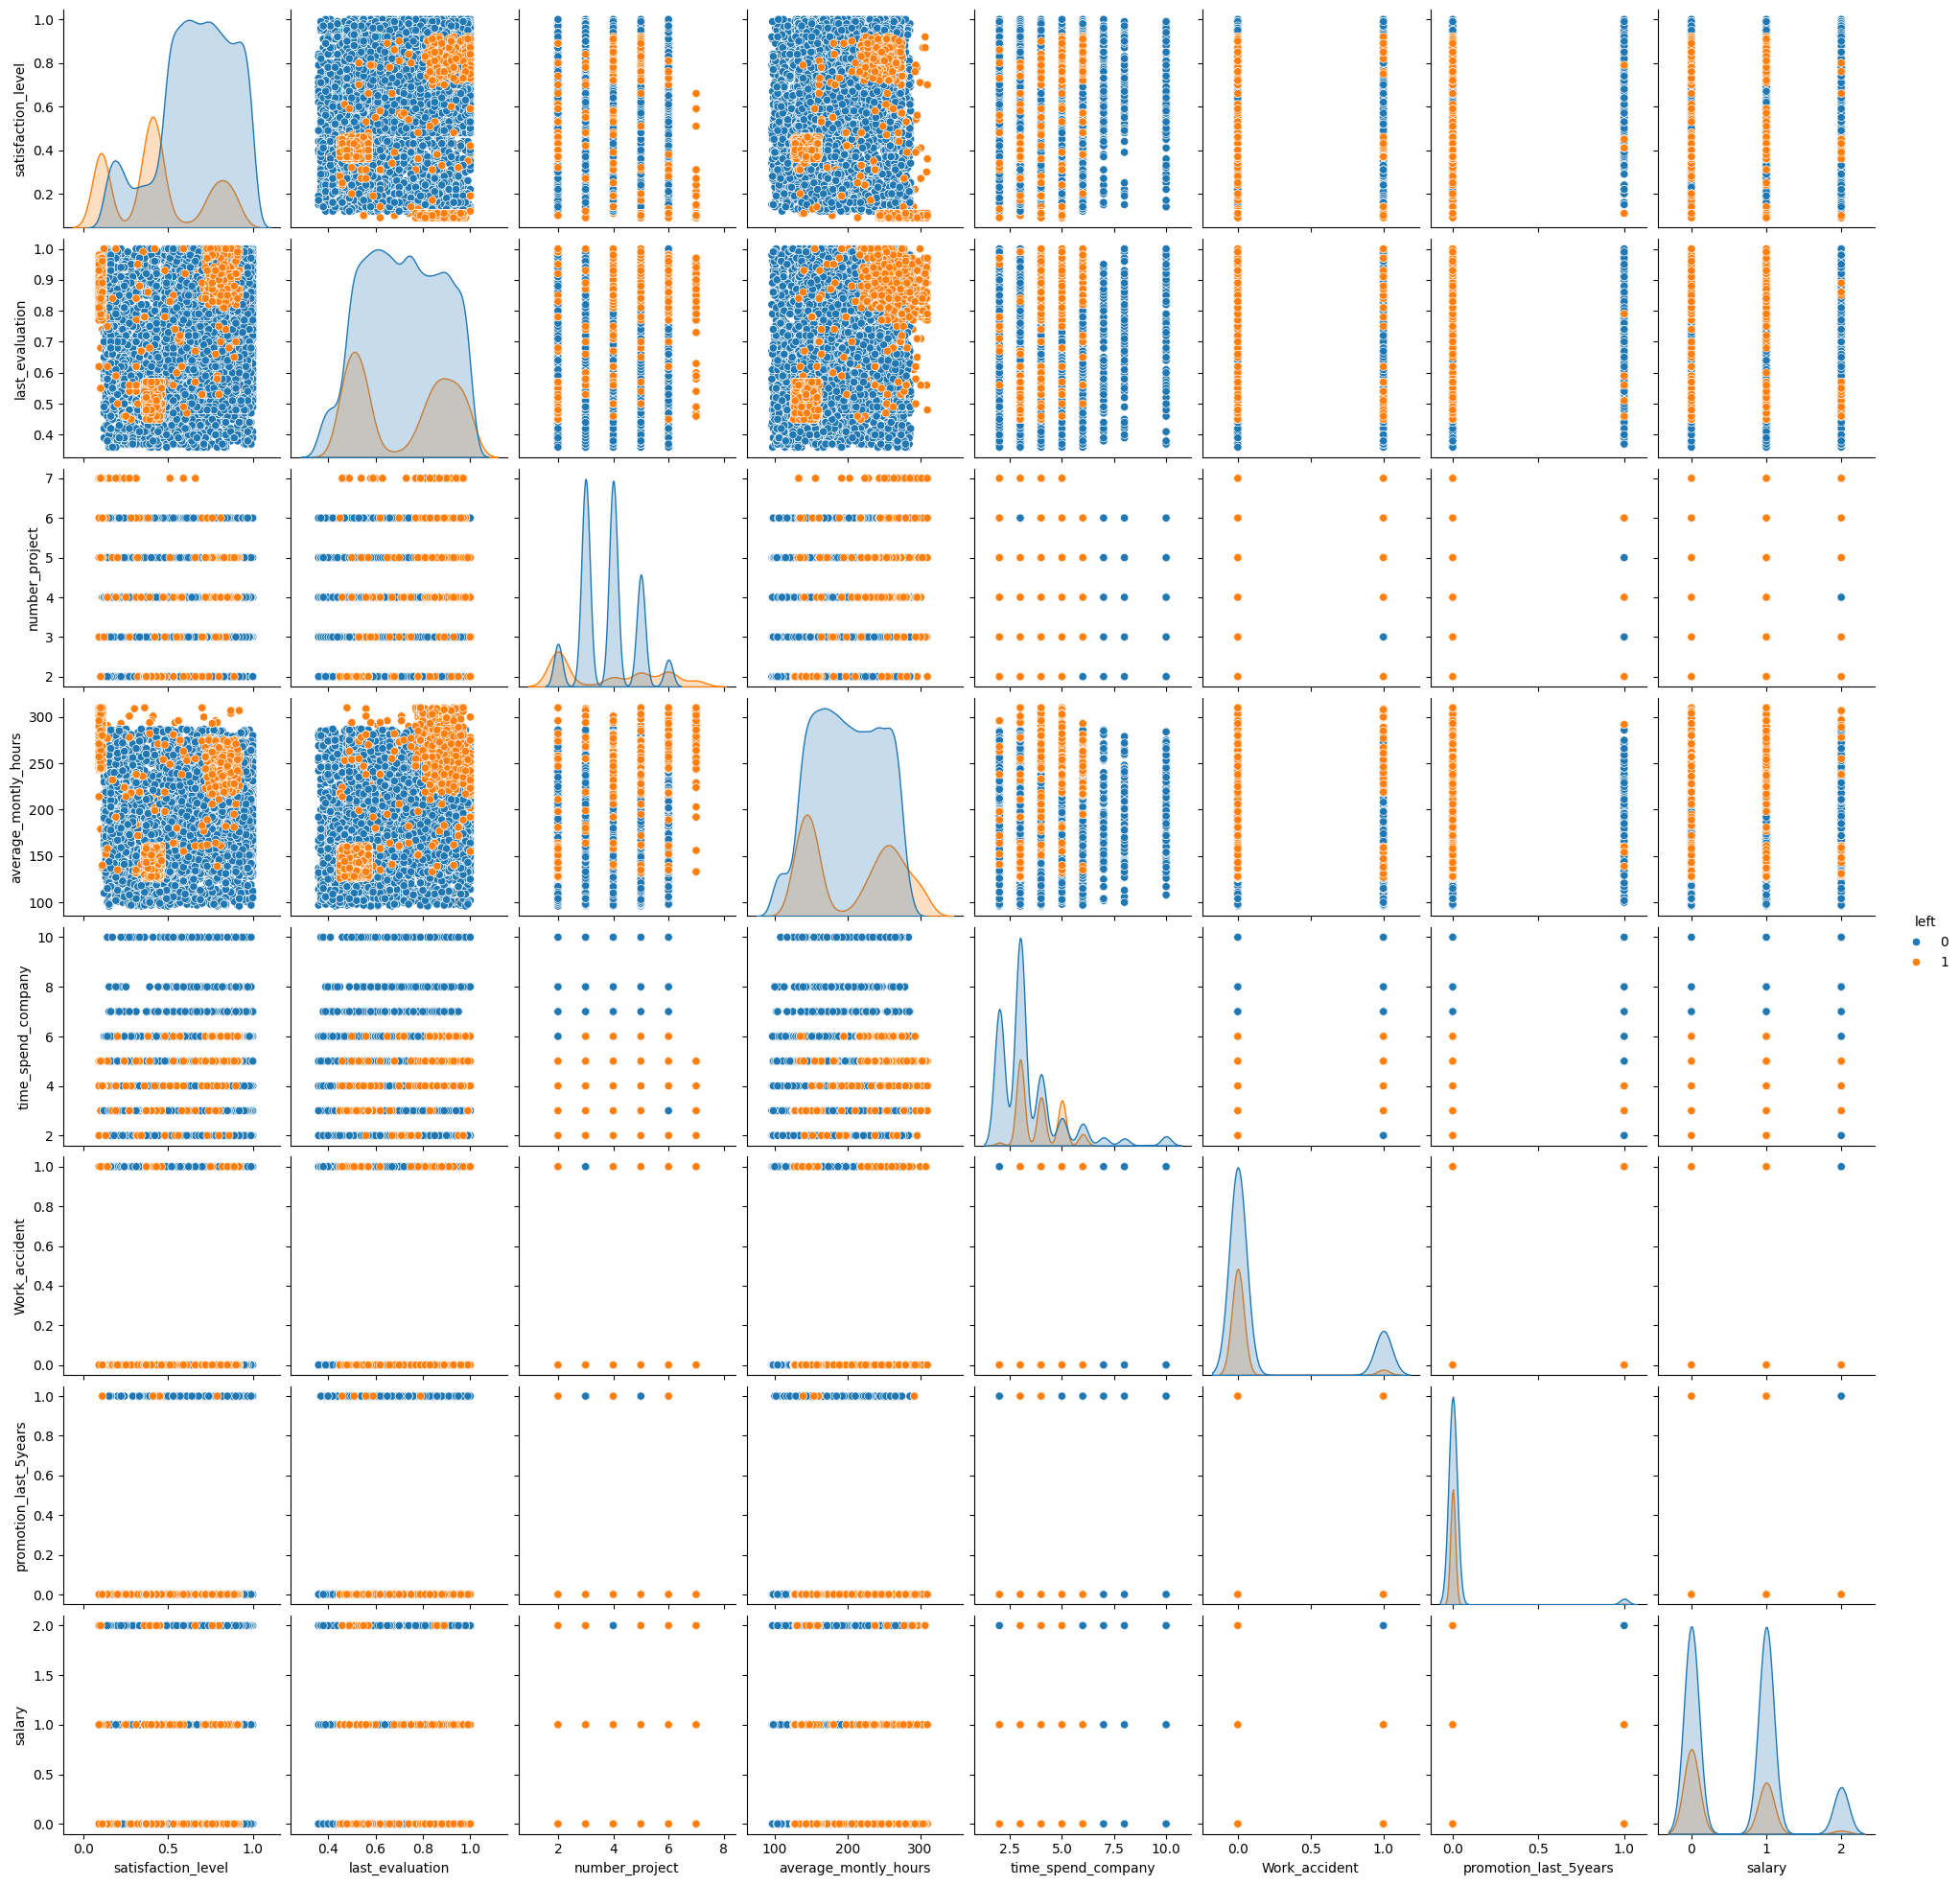

<ipython-input-60-bc7d8d186167>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


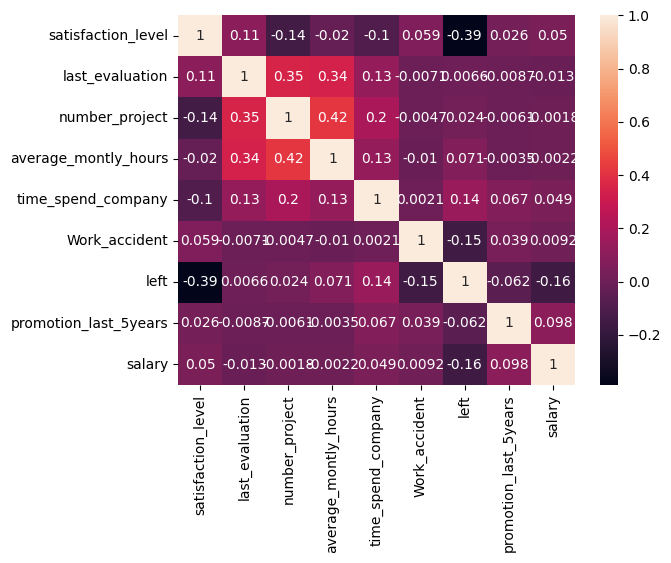

In [ ]:
sns.pairplot(df, hue="left")
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Blue dot indicates they stayed and yellow indicates they left.
# looking at the heat map avarage hours, numbers of years and last evaluation and salary the factors to leave the company

In [ ]:
# Balance and then split the data into a test-train split
display(df.info())
feature = df.drop("left", axis=1)
feature = df.drop("department", axis=1)
label = df['left']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, label, train_size=.8, test_size=.2, random_state=101)
print("X - Train: " + str(x_train.shape))
print("X - Test: " + str(x_test.shape))
print("Y - Test: " + str(y_test.shape))
print("Y - Train: " + str(y_train.shape))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


None

X - Train: (11999, 9)
X - Test: (3000, 9)
Y - Test: (3000,)
Y - Train: (11999,)


In [ ]:
# Determine whether grouping features together into a single feature helps.
# Specifically, look at time spent at company and number of projects
# (which both correlate with tenure, but together can capture a notion of “engagement”)
x_train["engagement"] = x_train["time_spend_company"] * x_train["number_project"]
x_test["engagement"] = x_test["time_spend_company"] * x_test["number_project"]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_hat = dtc.predict(x_test)

# Initialize classifiers
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Train models using k-fold cross-validation
svm_scores = cross_val_score(svm_clf, x_train, y_train, cv=5)
dt_scores = cross_val_score(dt_clf, x_train, y_train, cv=5)
rf_scores = cross_val_score(rf_clf, x_train, y_train, cv=5)
conf_matrix = metrics.confusion_matrix(y_test, y_hat)

# Print average scores
print("SVM Average Accuracy:", svm_scores.mean())
print("Decision Tree Average Accuracy:", dt_scores.mean())
print("Random Forest Average Accuracy:", rf_scores.mean())
print("Confusion Matrix: \n", conf_matrix)

SVM Average Accuracy: 0.8039003404196192
Decision Tree Average Accuracy: 1.0
Random Forest Average Accuracy: 1.0
Confusion Matrix: 
 [[2262    0]
 [   0  738]]


In [ ]:
# Train Best Model with All Available Data
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on test set
y_pred = rf_clf.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#Hence by using all aviable our model accuracy increases significantly.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
